In [2]:
import pandas as pd
from transformers import pipeline

# Leer dataset desde CSV
df = pd.read_csv("../data/comentarios.csv")

# Cargar pipeline de análisis de sentimientos (multilingüe, soporta español)
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)

Device set to use mps:0


In [3]:
import spacy
nlp = spacy.load("es_core_news_sm")
print("spaCy cargado: usando lematización y stopwords de spaCy.")

def preprocess_spacy(text):
    doc = nlp(str(text).lower())
    tokens = [t.lemma_ for t in doc if not t.is_stop and t.is_alpha]
    return " ".join(tokens)

df["texto_preprocesado"] = df["texto_comentario"].apply(preprocess_spacy)

spaCy cargado: usando lematización y stopwords de spaCy.


In [4]:
# Analizar sentimientos
results = df["texto_preprocesado"].apply(lambda x: sentiment_pipeline(x)[0])

# Guardar resultados en nuevas columnas
df["sentimiento"] = results.apply(lambda r: r["label"])
df["score"] = results.apply(lambda r: r["score"])

# Mostrar tabla final
print(df[["id_comentario", "calificacion", "sentimiento", "score"]])

# (Opcional) exportar a CSV con resultados
df.to_csv("comentarios_con_sentimiento.csv", index=False)

     id_comentario  calificacion sentimiento     score
0                1             5     5 stars  0.636286
1                2             4     4 stars  0.343703
2                3             5     4 stars  0.269417
3                4             3     3 stars  0.433529
4                5             4     4 stars  0.427259
..             ...           ...         ...       ...
615            616             5     5 stars  0.814916
616            617             5     5 stars  0.897431
617            618             4     5 stars  0.490447
618            619             4     4 stars  0.454922
619            620             5     5 stars  0.726332

[620 rows x 4 columns]


/var/folders/sl/2x216nz107xcfzxlmr7tr47m0000gn/T/ipykernel_94043/129840792.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentimiento_simple", palette="Set2")


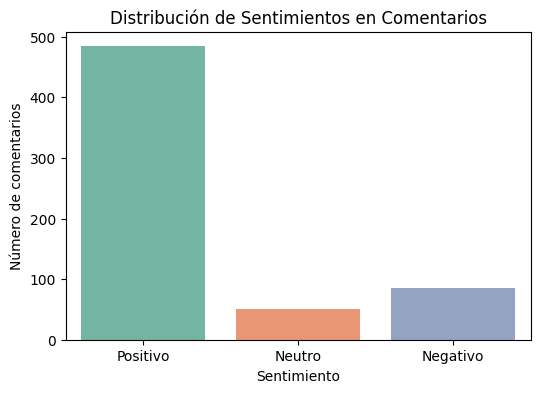

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalizar etiquetas (opcional: agrupar positivo / neutro / negativo)
def normalize_label(label):
    estrellas = int(label.split()[0])  # "5 stars" → 5
    if estrellas <= 2:
        return "Negativo"
    elif estrellas == 3:
        return "Neutro"
    else:
        return "Positivo"

df["sentimiento_simple"] = df["sentimiento"].apply(normalize_label)

# --- Visualización ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sentimiento_simple", palette="Set2")
plt.title("Distribución de Sentimientos en Comentarios")
plt.xlabel("Sentimiento")
plt.ylabel("Número de comentarios")
plt.show()